In [1]:
import mdtraj as md, numpy as np
t = md.load('traj.dcd', top='solvated.pdb')
prot_idx = t.topology.select('protein')   # exclude waters/ions
tp = t.atom_slice(prot_idx)
r = md.rmsd(tp, tp, 0)  # nm
np.savetxt('rmsd.csv', r, delimiter=',')
print(f"Protein RMSD first/median/last (nm): {r[0]:.3f}, {np.median(r):.3f}, {r[-1]:.3f}")

Protein RMSD first/median/last (nm): 0.000, 0.106, 0.090


Saved rmsd.png


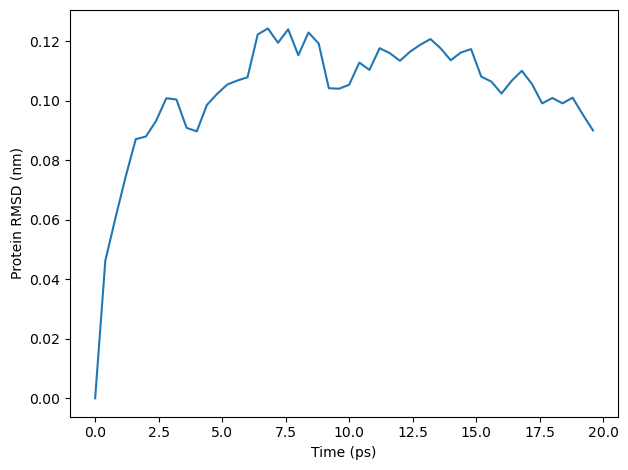

In [4]:
import numpy as np, matplotlib.pyplot as plt
r = np.loadtxt('rmsd.csv', delimiter=',')
t = np.arange(len(r))*0.4      # 0.004 ps/step * 100-step DCD stride = 0.4 ps/frame
plt.plot(t, r)
plt.xlabel('Time (ps)'); plt.ylabel('Protein RMSD (nm)')
plt.tight_layout(); plt.savefig('rmsd.png', dpi=150)
print("Saved rmsd.png")
